### Import libraries

In [1]:
import os
from tqdm import tqdm
import cv2
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.backend import clear_session

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2025-04-23 01:25:52.357411: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-23 01:25:52.357460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-23 01:25:52.358229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-23 01:25:52.362794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Stating Global variables

In [2]:
SEED = 42
PATH = '/home/ychien13/my_github/DAT490/original_datasets'

In [3]:
LABELS = os.listdir(PATH)
print(LABELS)

['meningioma', 'normal', 'pituitary', 'glioma']


### Loading the dataset

In [4]:
img=cv2.imread('/home/ychien13/my_github/DAT490/original_datasets/meningioma/Tr-me_0211.jpg')
print(img.shape)

(250, 250, 3)


In [5]:
images=[]
labels=[]
for type_index,cancer_type in enumerate(LABELS):
    folder_path = f'{PATH}/{cancer_type}'
    for image in tqdm(os.listdir(folder_path)):
        try:
            img=cv2.imread(os.path.join(folder_path,image))
            img = cv2.resize(img,(250,250))
            images.append(img)
            labels.append(type_index)
        except Exception as e:
            print(f'Error {e}')

labels = np.array(labels)
images = np.array(images)

 26%|██▌       | 1030/4005 [00:01<00:04, 615.59it/s]

Error OpenCV(4.9.0) /home/conda/feedstock_root/build_artifacts/libopencv_1704864625327/work/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 42%|████▏     | 1666/4005 [00:02<00:03, 628.38it/s]

Error OpenCV(4.9.0) /home/conda/feedstock_root/build_artifacts/libopencv_1704864625327/work/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 66%|██████▋   | 2660/4005 [00:04<00:02, 670.62it/s]

Error OpenCV(4.9.0) /home/conda/feedstock_root/build_artifacts/libopencv_1704864625327/work/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 4178/4178 [00:05<00:00, 759.29it/s]


### Splitting Dataset

In [6]:
X_train,X_test,y_train,y_test = train_test_split(images,
                                                 labels,
                                                 train_size=0.7,
                                                 test_size=0.3,
                                                 stratify=labels,
                                                 shuffle=True,
                                                 random_state=SEED
                                                )

### Encode the labels

In [7]:
encoded_y_train:np.array = to_categorical(y_train)
encoded_y_test:np.array = to_categorical(y_test)

### Build model

In [8]:
checkpoint = ModelCheckpoint("cnn_model.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="auto",
                             verbose=1
                            )

In [9]:
model = models.Sequential([
    layers.Input(shape=(250, 250, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',  
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 128)       0

2025-04-23 01:26:42.878224: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79195 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


### Train Model

In [ ]:
history=model.fit(X_train, 
          encoded_y_train, 
          epochs=10, 
          validation_split=0.2,
          verbose=True,
          batch_size=32,
          callbacks=[checkpoint]
         )

Epoch 1/10


2025-04-23 01:26:51.039368: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-04-23 01:26:51.339962: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-04-23 01:26:52.151975: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-04-23 01:26:52.281643: I external/local_xla/xla/service/service.cc:168] XLA service 0x153ea54e7030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-23 01:26:52.281691: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2025-04-23 01:26:52.322932: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745396812.472336  915762 device_compiler.h:

272/272 [==============================] - ETA: 0s - loss: 11.7989 - accuracy: 0.7100
Epoch 1: val_accuracy improved from -inf to 0.83985, saving model to cnn_model.keras
272/272 [==============================] - 8s 17ms/step - loss: 11.7989 - accuracy: 0.7100 - val_loss: 0.4530 - val_accuracy: 0.8399
Epoch 2/10
271/272 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8609
Epoch 2: val_accuracy improved from 0.83985 to 0.88909, saving model to cnn_model.keras
272/272 [==============================] - 4s 14ms/step - loss: 0.3899 - accuracy: 0.8609 - val_loss: 0.3235 - val_accuracy: 0.8891
Epoch 3/10
269/272 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9326
Epoch 3: val_accuracy improved from 0.88909 to 0.90980, saving model to cnn_model.keras
272/272 [==============================] - 4s 14ms/step - loss: 0.1890 - accuracy: 0.9329 - val_loss: 0.3001 - val_accuracy: 0.9098
Epoch 4/10
272/272 [==============================] - ETA: 0s - 

### Evaluation

In [10]:
model = models.load_model('cnn_model.keras')

2025-04-23 00:22:58.186458: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79195 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


In [65]:
predict = model.predict(X_test)

146/146 [==============================] - 1s 4ms/step


In [66]:
y_pred = np.argmax(predict,axis=1)
y_true = np.argmax(encoded_y_test,axis=1)

In [67]:
report = classification_report(y_true,y_pred)
cm = confusion_matrix(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1103
           1       0.97      0.97      0.97      1201
           2       0.97      0.99      0.98      1099
           3       0.97      0.95      0.96      1253

    accuracy                           0.96      4656
   macro avg       0.96      0.96      0.96      4656
weighted avg       0.96      0.96      0.96      4656



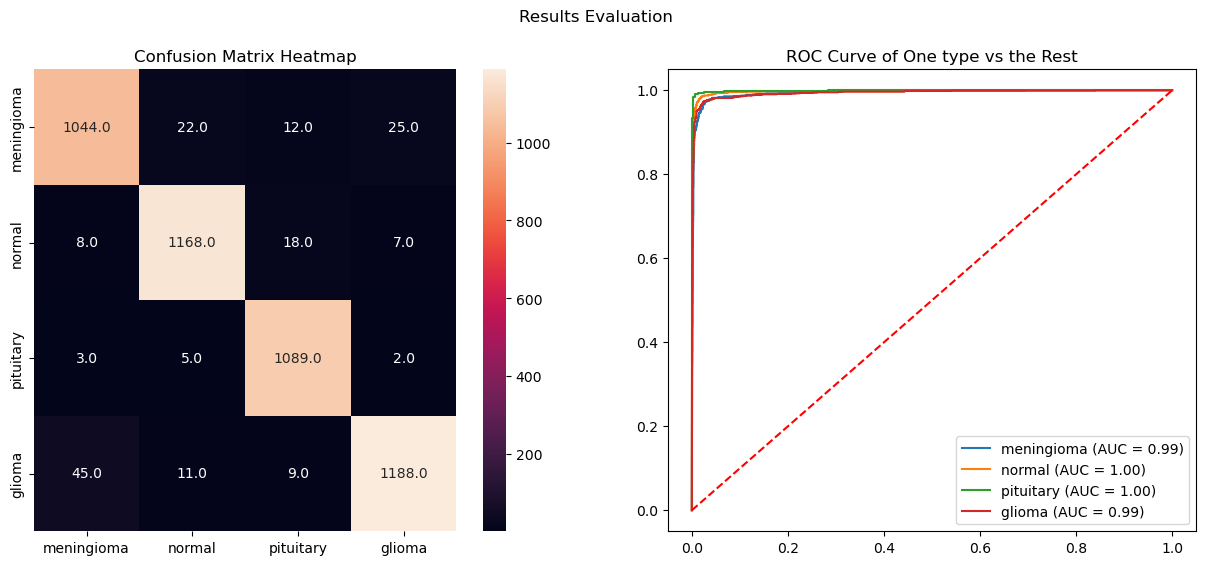

In [101]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.heatmap(cm,
            xticklabels=LABELS,
            yticklabels=LABELS,
            ax=ax1,
            annot=True,
            fmt='.1f'
           )

for i in range(0,len(LABELS)):
    fpr, tpr, thresholds = roc_curve(encoded_y_test[:,i],predict[:,i])
    auc_score=auc(fpr,tpr)   
    ax2.plot(fpr,tpr,label=f'{LABELS[i]} (AUC = {auc_score:.2f})')

ax2.plot([0,1],[0,1],'r--')
ax2.legend()

fig.suptitle('Results Evaluation')
ax1.set_title('Confusion Matrix Heatmap')
ax2.set_title('ROC Curve of One type vs the Rest')

plt.show()